In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
index_names = ['unit', 'cycle']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [18]:
# Training data. Failure occurs on the last cycle.
train_df = pd.read_csv('Dataset/PM_train.txt', sep=" ", header=None, names=col_names)

# Test data. Failure occurs on the last cycle.
test_df = pd.read_csv('Dataset/PM_test.txt', sep=" ", header=None, names=col_names)

What kind of function does each sensor have?

In [19]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

# Data from the NASA dataset
Column 0 corresponds to the different engine cycles

Column 1 corresponds to the same engine timestamp until failure occured

Column 2-4 correspond to the settings of the engine

Column 5-27 corresond to the different values we got from sensors located in the engine

In [20]:
train_df.head()

unit   cycle  setting_1  setting_2  setting_3      s_1      s_2    s_3  \
1 1 -0.0007 -0.0004      100.0     518.67     641.82  1589.70  1400.60  14.62   
  2  0.0019 -0.0003      100.0     518.67     642.15  1591.82  1403.14  14.62   
  3 -0.0043  0.0003      100.0     518.67     642.35  1587.99  1404.20  14.62   
  4  0.0007  0.0000      100.0     518.67     642.35  1582.79  1401.87  14.62   
  5 -0.0019 -0.0002      100.0     518.67     642.37  1582.85  1406.22  14.62   

       s_4     s_5  ...     s_12    s_13  s_14  s_15  s_16   s_17   s_18  \
1 1  21.61  554.36  ...  8138.62  8.4195  0.03   392  2388  100.0  39.06   
  2  21.61  553.75  ...  8131.49  8.4318  0.03   392  2388  100.0  39.00   
  3  21.61  554.26  ...  8133.23  8.4178  0.03   390  2388  100.0  38.95   
  4  21.61  554.45  ...  8133.83  8.3682  0.03   392  2388  100.0  38.88   
  5  21.61  554.00  ...  8133.80  8.4294  0.03   393  2388  100.0  38.90   

        s_19  s_20  s_21  
1 1  23.4190   NaN   NaN  
  2  23.4236   NaN   NaN  
  3  23.3442   NaN   NaN  
  4  23.3739   NaN   NaN  
  5  23.4044   NaN   NaN  

[5 rows x 26 columns]

In [21]:
print(train_df.info())



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 20631 entries, (1, 1) to (100, 200)
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unit       20631 non-null  float64
 1   cycle      20631 non-null  float64
 2   setting_1  20631 non-null  float64
 3   setting_2  20631 non-null  float64
 4   setting_3  20631 non-null  float64
 5   s_1        20631 non-null  float64
 6   s_2        20631 non-null  float64
 7   s_3        20631 non-null  float64
 8   s_4        20631 non-null  float64
 9   s_5        20631 non-null  float64
 10  s_6        20631 non-null  float64
 11  s_7        20631 non-null  float64
 12  s_8        20631 non-null  float64
 13  s_9        20631 non-null  float64
 14  s_10       20631 non-null  float64
 15  s_11       20631 non-null  float64
 16  s_12       20631 non-null  float64
 17  s_13       20631 non-null  float64
 18  s_14       20631 non-null  float64
 19  s_15       20631 non-null  int64  
 

Column 26 and 27 have no values. We will drop those.

In [22]:
train_df = train_df.drop(columns=["s_20","s_21"])

In [23]:
train_df.head()

unit   cycle  setting_1  setting_2  setting_3      s_1      s_2    s_3  \
1 1 -0.0007 -0.0004      100.0     518.67     641.82  1589.70  1400.60  14.62   
  2  0.0019 -0.0003      100.0     518.67     642.15  1591.82  1403.14  14.62   
  3 -0.0043  0.0003      100.0     518.67     642.35  1587.99  1404.20  14.62   
  4  0.0007  0.0000      100.0     518.67     642.35  1582.79  1401.87  14.62   
  5 -0.0019 -0.0002      100.0     518.67     642.37  1582.85  1406.22  14.62   

       s_4     s_5  ...    s_10     s_11     s_12    s_13  s_14  s_15  s_16  \
1 1  21.61  554.36  ...  521.66  2388.02  8138.62  8.4195  0.03   392  2388   
  2  21.61  553.75  ...  522.28  2388.07  8131.49  8.4318  0.03   392  2388   
  3  21.61  554.26  ...  522.42  2388.03  8133.23  8.4178  0.03   390  2388   
  4  21.61  554.45  ...  522.86  2388.08  8133.83  8.3682  0.03   392  2388   
  5  21.61  554.00  ...  522.19  2388.04  8133.80  8.4294  0.03   393  2388   

      s_17   s_18     s_19  
1 1  100.0  39.06  23.4190  
  2  100.0  39.00  23.4236  
  3  100.0  38.95  23.3442  
  4  100.0  38.88  23.3739  
  5  100.0  38.90  23.4044  

[5 rows x 24 columns]

In [24]:
descriptive_stats = train_df.describe(include='all').T
nan_counts = train_df.isna().sum()
zero_counts = (train_df == 0).sum()
summary_df = pd.DataFrame({
    'mean': descriptive_stats['mean'],
    'std': descriptive_stats['std'],
    'nan_count': nan_counts,
    'zero_count': zero_counts
})


In [25]:
print(summary_df)

                  mean           std  nan_count  zero_count
unit         -0.000009  2.187313e-03          0         413
cycle         0.000002  2.930621e-04          0        2070
setting_1   100.000000  0.000000e+00          0           0
setting_2   518.670000  0.000000e+00          0           0
setting_3   642.680934  5.000533e-01          0           0
s_1        1590.523119  6.131150e+00          0           0
s_2        1408.933782  9.000605e+00          0           0
s_3          14.620000  1.776400e-15          0           0
s_4          21.609803  1.388985e-03          0           0
s_5         553.367711  8.850923e-01          0           0
s_6        2388.096652  7.098548e-02          0           0
s_7        9065.242941  2.208288e+01          0           0
s_8           1.300000  0.000000e+00          0           0
s_9          47.541168  2.670874e-01          0           0
s_10        521.413470  7.375534e-01          0           0
s_11       2388.096152  7.191892e-02    

/Users/antonis/miniforge3/envs/py10/lib/python3.10/site-packages/pandas/core/algorithms.py:1743: RuntimeWarning: invalid value encountered in log
  return lib.map_infer(values, mapper, convert=convert)


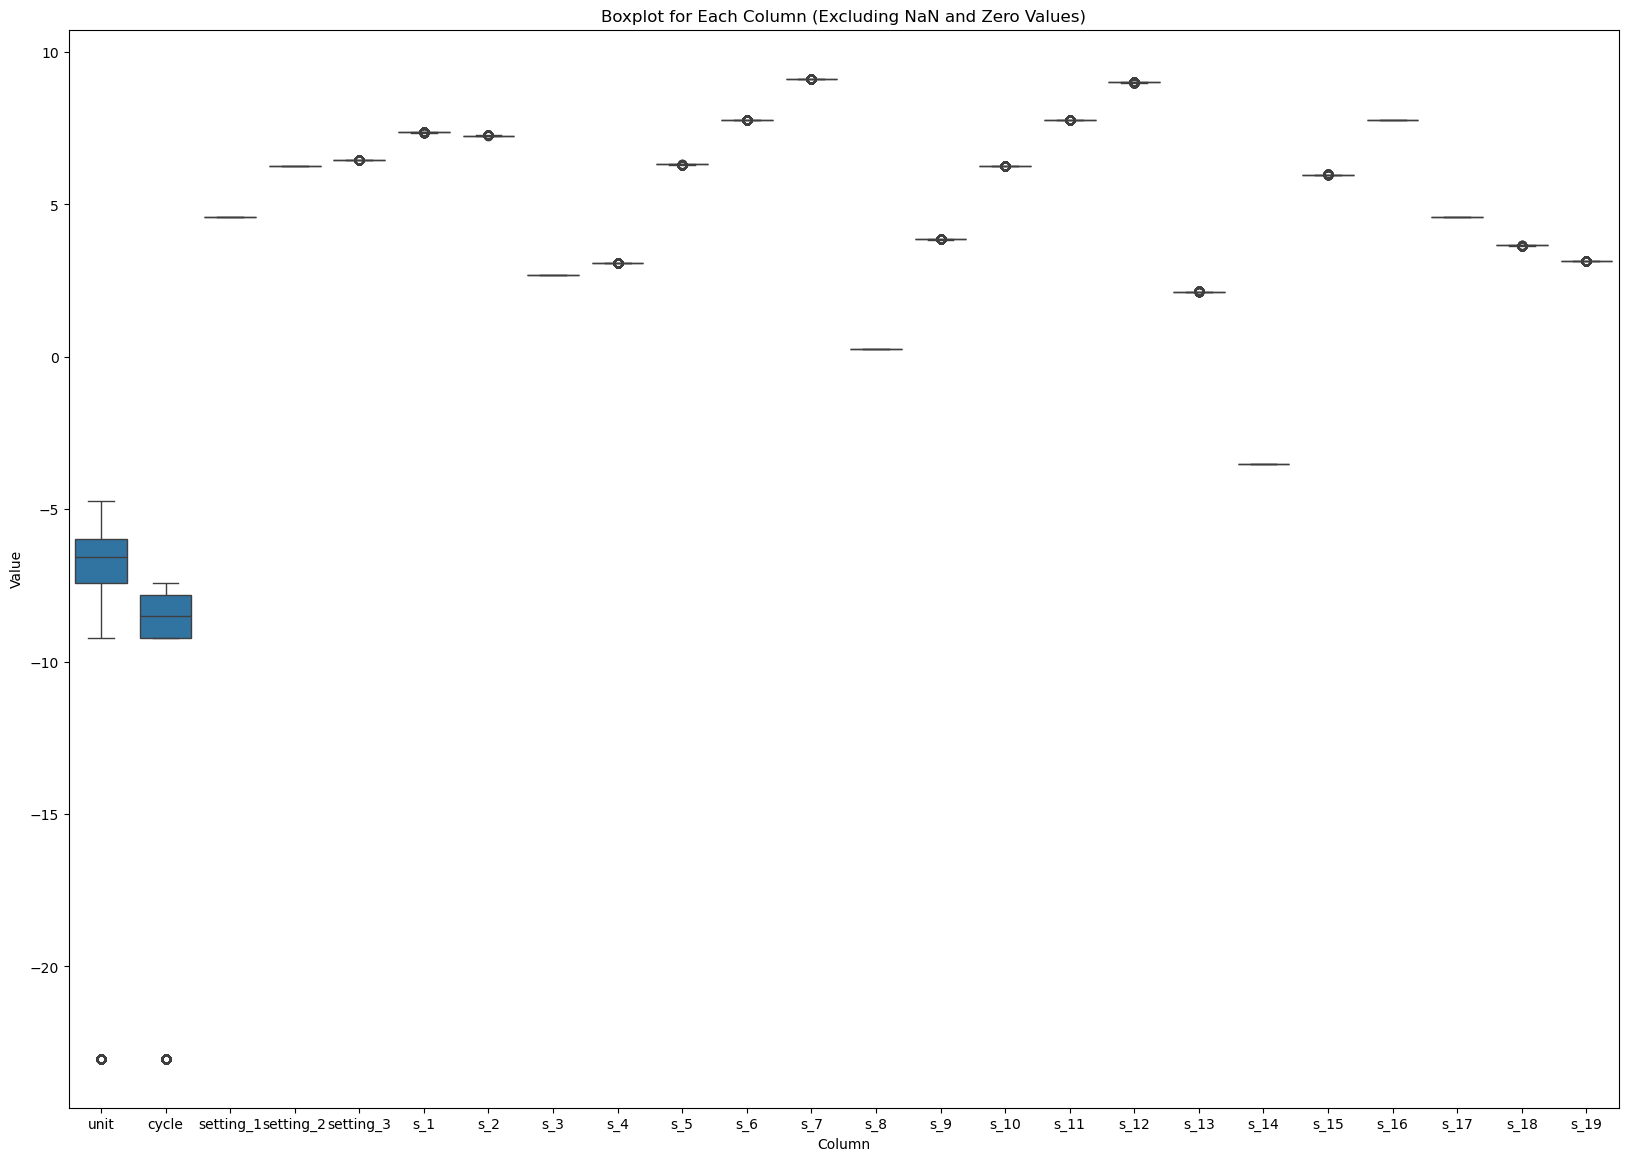

In [26]:

epsilon = 1e-10
df_cleaned = train_df + epsilon
df_log = df_cleaned.map(np.log)
melted_df_cleaned = df_log.melt(var_name='Column', value_name='Value')

plt.figure(figsize=(20, 14))
sns.boxplot(x='Column', y='Value', data=melted_df_cleaned)
plt.title('Boxplot for Each Column (Excluding NaN and Zero Values)')
plt.show()

In [27]:
df_result = pd.DataFrame(columns=['Case', 'Cycles before failure'])

changes = train_df.iloc[:, 0].ne(train_df.iloc[:, 0].shift()).cumsum()


result_rows = []

for unique_val in changes.unique():
    last_index = changes[changes == unique_val].index[-1]
    result_rows.append({'Case':train_df.iloc[last_index, 0], 'Cycles before failure': train_df.iloc[last_index, 1]})

df_result = pd.DataFrame(result_rows)
df_result

IndexingError: Too many indexers

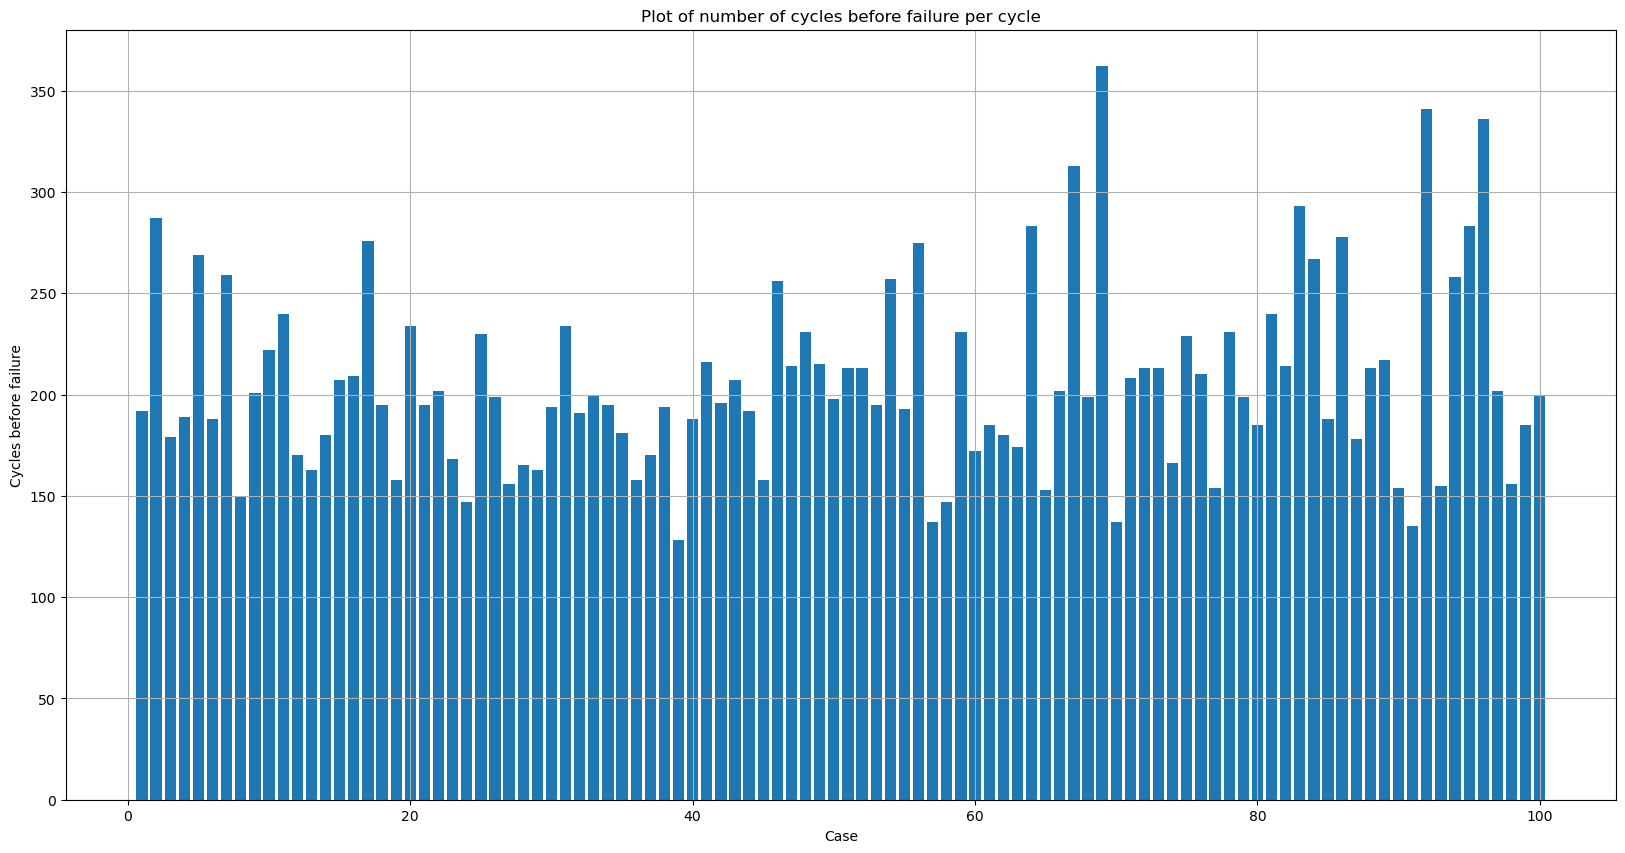

In [ ]:
plt.figure(figsize=(20, 10))
plt.bar(df_result['Case'], df_result['Cycles before failure'])

plt.xlabel('Case')
plt.ylabel('Cycles before failure')
plt.title('Plot of number of cycles before failure per cycle')
plt.grid(True)
plt.show()

Correlation matrix 

<Axes: >

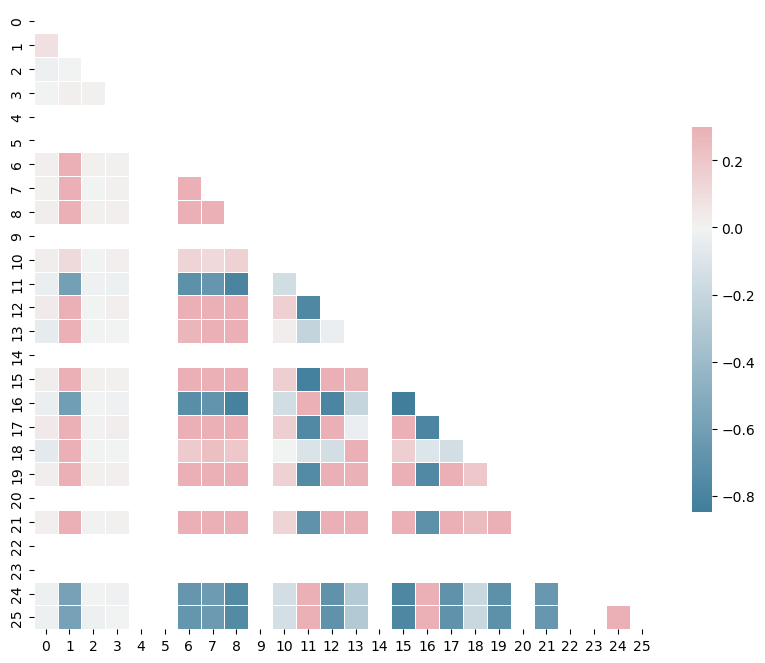

In [ ]:

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})